<a href="https://colab.research.google.com/github/drstannwoji2019/ML_Projects/blob/main/ML_Stat_CompAnyl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Machine Learning Model Performance:
                        FDI_MAE       FDI_MSE    FDI_R2       Rem_MAE  \
Linear Regression  3.810607e+09  1.738649e+19 -5.510611  6.600651e+09   
Random Forest      1.451141e+09  2.741538e+18 -0.026606  2.484467e+09   
XGBoost            1.916262e+09  4.102811e+18 -0.536354  3.027941e+09   
SVR                2.278946e+09  7.864079e+18 -1.944812  2.740501e+09   

                        Rem_MSE    Rem_R2  
Linear Regression  5.189089e+19 -9.226157  
Random Forest      8.638174e+18 -0.702328  
XGBoost            1.392354e+19 -1.743918  
SVR                1.049446e+19 -1.068147  

Statistical Model Performance:
             FDI_MAE       FDI_MSE    FDI_R2       Rem_MAE       Rem_MSE  \
ARIMA   2.894123e+09  1.013624e+19 -2.795654  7.448724e+09  6.658844e+19   
SARIMA  1.160988e+09  1.404649e+18  0.474010  7.522407e+09  6.593102e+19   

           Rem_R2  
ARIMA  -12.122609  
SARIMA -11.993050  


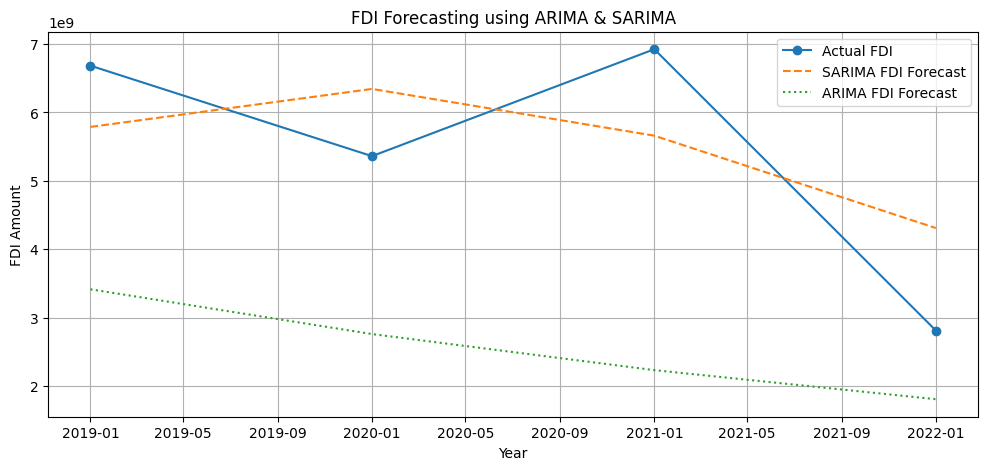

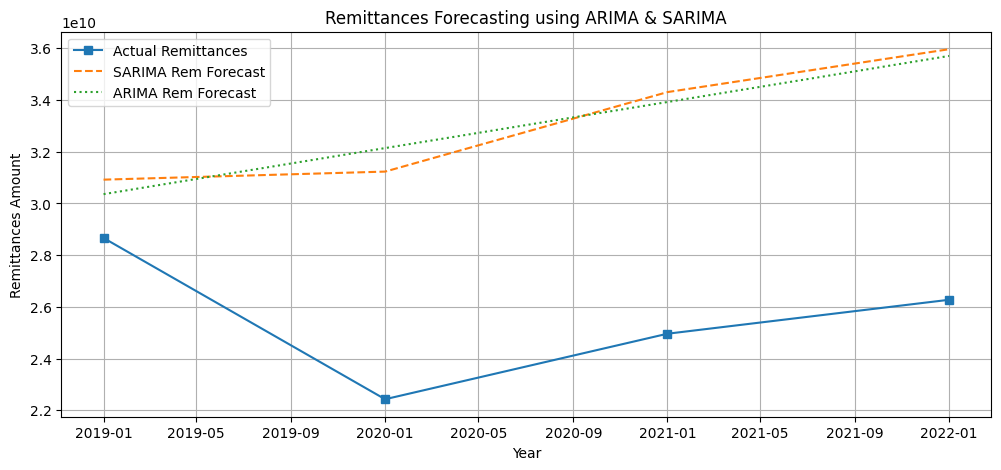

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

# Load dataset
file_path = "FDI_Rem_Analysis_2004_2022.csv"  # Adjust this path as needed
df = pd.read_csv('/FDI_Rem_Analysis_2004_2022.csv')

# Convert 'Year' to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

# Selecting target variables (FDI and Remittances)
targets = ['FDI_Total', 'Rem_Total']

# Splitting into training (2004-2018) and testing (2019-2022)
train = df.loc['2004':'2018']
test = df.loc['2019':'2022']

# Preparing training and testing sets
X_train = train.index.year.values.reshape(-1, 1)
y_train_fdi = train['FDI_Total']
y_train_rem = train['Rem_Total']

X_test = test.index.year.values.reshape(-1, 1)
y_test_fdi = test['FDI_Total']
y_test_rem = test['Rem_Total']

# Machine Learning Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=50, max_depth=3, random_state=42),
    "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1)
}

# Train and evaluate ML models
ml_results = {}
for name, model in models.items():
    model.fit(X_train, y_train_fdi)
    predictions_fdi = model.predict(X_test)

    model.fit(X_train, y_train_rem)
    predictions_rem = model.predict(X_test)

    ml_results[name] = {
        "FDI_MAE": mean_absolute_error(y_test_fdi, predictions_fdi),
        "FDI_MSE": mean_squared_error(y_test_fdi, predictions_fdi),
        "FDI_R2": r2_score(y_test_fdi, predictions_fdi),
        "Rem_MAE": mean_absolute_error(y_test_rem, predictions_rem),
        "Rem_MSE": mean_squared_error(y_test_rem, predictions_rem),
        "Rem_R2": r2_score(y_test_rem, predictions_rem),
    }

# Convert ML results to DataFrame
ml_results_df = pd.DataFrame(ml_results).T
print("\nMachine Learning Model Performance:")
print(ml_results_df)

# Statistical Models - ARIMA
arima_fdi_model = sm.tsa.ARIMA(train['FDI_Total'], order=(1,1,1)).fit()
arima_fdi_forecast = arima_fdi_model.forecast(steps=len(test))

arima_rem_model = sm.tsa.ARIMA(train['Rem_Total'], order=(1,1,1)).fit()
arima_rem_forecast = arima_rem_model.forecast(steps=len(test))

# Evaluate ARIMA performance
arima_results = {
    "FDI_MAE": mean_absolute_error(test['FDI_Total'], arima_fdi_forecast),
    "FDI_MSE": mean_squared_error(test['FDI_Total'], arima_fdi_forecast),
    "FDI_R2": r2_score(test['FDI_Total'], arima_fdi_forecast),
    "Rem_MAE": mean_absolute_error(test['Rem_Total'], arima_rem_forecast),
    "Rem_MSE": mean_squared_error(test['Rem_Total'], arima_rem_forecast),
    "Rem_R2": r2_score(test['Rem_Total'], arima_rem_forecast),
}

# Statistical Models - SARIMA
sarima_fdi_model = sm.tsa.SARIMAX(train['FDI_Total'], order=(1,1,1), seasonal_order=(1,1,1,4)).fit()
sarima_fdi_forecast = sarima_fdi_model.forecast(steps=len(test))

sarima_rem_model = sm.tsa.SARIMAX(train['Rem_Total'], order=(1,1,1), seasonal_order=(1,1,1,4)).fit()
sarima_rem_forecast = sarima_rem_model.forecast(steps=len(test))

# Evaluate SARIMA performance
sarima_results = {
    "FDI_MAE": mean_absolute_error(test['FDI_Total'], sarima_fdi_forecast),
    "FDI_MSE": mean_squared_error(test['FDI_Total'], sarima_fdi_forecast),
    "FDI_R2": r2_score(test['FDI_Total'], sarima_fdi_forecast),
    "Rem_MAE": mean_absolute_error(test['Rem_Total'], sarima_rem_forecast),
    "Rem_MSE": mean_squared_error(test['Rem_Total'], sarima_rem_forecast),
    "Rem_R2": r2_score(test['Rem_Total'], sarima_rem_forecast),
}

# Convert Statistical results to DataFrame
stat_results_df = pd.DataFrame({"ARIMA": arima_results, "SARIMA": sarima_results}).T
print("\nStatistical Model Performance:")
print(stat_results_df)

# Visualizing the Results
plt.figure(figsize=(12, 5))
plt.plot(test.index, test['FDI_Total'], label="Actual FDI", marker='o')
plt.plot(test.index, sarima_fdi_forecast, label="SARIMA FDI Forecast", linestyle="dashed")
plt.plot(test.index, arima_fdi_forecast, label="ARIMA FDI Forecast", linestyle="dotted")
plt.xlabel("Year")
plt.ylabel("FDI Amount")
plt.title("FDI Forecasting using ARIMA & SARIMA")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(test.index, test['Rem_Total'], label="Actual Remittances", marker='s')
plt.plot(test.index, sarima_rem_forecast, label="SARIMA Rem Forecast", linestyle="dashed")
plt.plot(test.index, arima_rem_forecast, label="ARIMA Rem Forecast", linestyle="dotted")
plt.xlabel("Year")
plt.ylabel("Remittances Amount")
plt.title("Remittances Forecasting using ARIMA & SARIMA")
plt.legend()
plt.grid(True)
plt.show()
